# QB Point Analysis
## by Christopher James

## Preliminary Wrangling

This dataset contains statistics of NFL quarterbacks (qbs) from the 2016 season. Wrangling on this dataset was done in the notebook 'pass-2016-wrangle.ipynb'. A summary of this can be found in the file 'wrangle_report.pdf'. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Any needed functions


# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [3]:
# Read 'pass-2016-master.csv' into dataframe called 'df_original', then make copy called 'df' for exploration.
df_original = pd.read_csv('pass-2016-master.csv')
df = df_original.copy()

In [4]:
df['Pos'].value_counts()

QB       54
WR       11
P         5
RB        4
K         1
MLB       1
FB/WR     1
NT        1
Name: Pos, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      96 non-null     int64  
 1   Player  96 non-null     object 
 2   Tm      96 non-null     object 
 3   Age     96 non-null     int64  
 4   Pos     78 non-null     object 
 5   G       96 non-null     int64  
 6   GS      96 non-null     int64  
 7   Cmp     96 non-null     int64  
 8   Att     96 non-null     int64  
 9   Cmp%    96 non-null     float64
 10  Yds     96 non-null     int64  
 11  TD      96 non-null     int64  
 12  TD%     96 non-null     float64
 13  Int     96 non-null     int64  
 14  Int%    96 non-null     float64
 15  Lng     96 non-null     int64  
 16  Y/A     96 non-null     float64
 17  AY/A    96 non-null     float64
 18  Y/C     81 non-null     float64
 19  Y/G     96 non-null     float64
 20  Rate    96 non-null     float64
 21  QBR     88 non-null     float64
 22  Sk  

In [6]:
# Create column that contains the percentage of all games that ended in a win. 
df['QBwin%'] = df['QBwin'] / (df['QBwin'] + df['QBlose'] + df['QBtie'])

In [7]:
# filter out all players who are not quarterbacks who had less than 100 pass attempts in a season.
df = df.query('Pos == "QB" & Att > 100')

In [8]:
df.head()

,Rk,Player,Tm,Age,Pos,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,QBwin,QBlose,QBtie,QBwin%
0,1,Drew Brees,NOR,37,QB,16,16,471,673,70.0,5208,37,5.5,15,2.2,98,7.7,7.8,11.1,325.5,101.7,65.1,27,184,7.18,7.27,3.9,2.0,4.0,7.0,9.0,0.0,0.4375
1,2,Joe Flacco,BAL,31,QB,16,16,436,672,64.9,4317,20,3.0,15,2.2,95,6.4,6.0,9.9,269.8,83.5,52.7,33,243,5.78,5.39,4.7,2.0,2.0,8.0,8.0,0.0,0.5000
2,3,Blake Bortles,JAX,24,QB,16,16,368,625,58.9,3905,23,3.7,16,2.6,51,6.2,5.8,10.6,244.1,78.8,42.8,34,197,5.63,5.23,5.2,1.0,1.0,3.0,13.0,0.0,0.1875
3,4,Aaron Rodgers,GNB,33,QB,16,16,401,610,65.7,4428,40,6.6,7,1.1,60,7.3,8.1,11.0,276.8,104.2,73.8,35,246,6.48,7.24,5.4,0.0,2.0,10.0,6.0,0.0,0.6250
4,5,Carson Wentz,PHI,24,QB,16,16,379,607,62.4,3782,16,2.6,14,2.3,73,6.2,5.7,10.0,236.4,79.3,49.4,33,213,5.58,5.09,5.2,1.0,1.0,7.0,9.0,0.0,0.4375


In [9]:
df.corr()['TD%']

Rk       -0.383626
Age       0.326116
G         0.504449
GS        0.520878
Cmp       0.509690
Att       0.476504
Cmp%      0.446663
Yds       0.616831
TD        0.863558
TD%       1.000000
Int       0.108271
Int%     -0.304491
Lng       0.187266
Y/A       0.718339
AY/A      0.770051
Y/C       0.517496
Y/G       0.657907
Rate      0.758195
QBR       0.738103
Sk        0.228052
Yds.1     0.202902
NY/A      0.726855
ANY/A     0.778069
Sk%      -0.400363
4QC      -0.039211
GWD       0.117480
QBwin     0.591395
QBlose   -0.016240
QBtie    -0.049153
QBwin%    0.554298
Name: TD%, dtype: float64

### What is the structure of your dataset?

This dataset contains 96 rows and 32 columns. There are 3 catagorical columns, while the rest are numerical. Those columns are 'Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD', 'QBwin', 'QBlose', and 'QBtie'.

### What is/are the main feature(s) of interest in your dataset?

I am looking to discover what features lead to a higher touchdown per pass attempt ratio (TD%).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe based on the coorelation numbers shown above, completion percentage (Cmp%), yards per attempt (Y/A), yards per catch (Y/C), yards per game (Y/G),  quarterback rating (QBR) and QB win percentage (QBwin%) will have an effect on this number. 

## Univariate Exploration

### Distribution of Completion Percentage

In [10]:
# Stats on Cmp% column.
cmp = df['Cmp%'].describe().round(0)
cmp

count    39.0
mean     62.0
std       5.0
min      53.0
25%      59.0
50%      62.0
75%      66.0
max      72.0
Name: Cmp%, dtype: float64

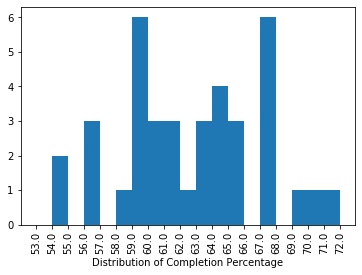

In [11]:
#Distribution of completion percentage
bins = np.arange(cmp['min'], cmp['max'] + 1, 1)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Cmp%', bins = bins)
plt.xlabel('Distribution of Completion Percentage')
plt.xticks(ticks, labels, rotation = 90);

The distribution of completion percentage ranges from 53% to 72%. A majority of the players tend to fall to the center of the distribution.

### Distribution of Average Yards per Attempt

In [12]:
# Stats on Y/A column.
ypa = df['Y/A'].describe().round(0)
ypa

count    39.0
mean      7.0
std       1.0
min       5.0
25%       7.0
50%       7.0
75%       8.0
max       9.0
Name: Y/A, dtype: float64

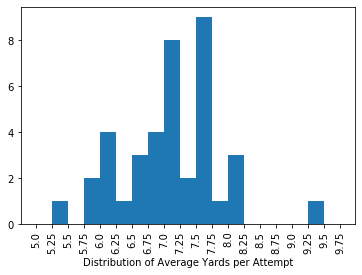

In [19]:
# Distribution of Average Yards per Attempt
bins = np.arange(ypa['min'], ypa['max'] + 1, 0.25)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/A', bins = bins)
plt.xlabel('Distribution of Average Yards per Attempt')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per attempt ranges from 5.25 to 9.25, with the majority of the players falling to the center of the distribution. Almost half of all players are in the 7.0 and 7.5 bins.

### Distribution of Average Yards per Catch

In [14]:
# Stats on Y/C column.
ypc = df['Y/C'].describe().round(0)
ypc

count    39.0
mean     11.0
std       1.0
min      10.0
25%      11.0
50%      11.0
75%      12.0
max      13.0
Name: Y/C, dtype: float64

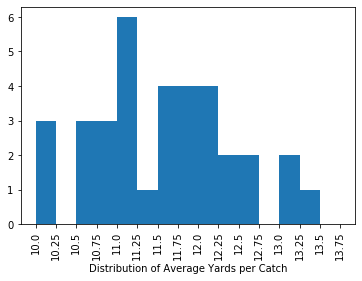

In [15]:
#Distribution of Average Yards per Catch
bins = np.arange(ypc['min'], ypc['max'] + 1, 0.25)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/C', bins = bins)
plt.xlabel('Distribution of Average Yards per Catch')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per catch ranges from 10 to 13.25. The majority of players range from 10.5 to 12.25.

### Distribution of Average Yards per Game

In [16]:
# # Stats on Y/G column
ypg = df['Y/G'].describe().round(0)
ypg

count     39.0
mean     238.0
std       45.0
min      135.0
25%      216.0
50%      241.0
75%      270.0
max      326.0
Name: Y/G, dtype: float64

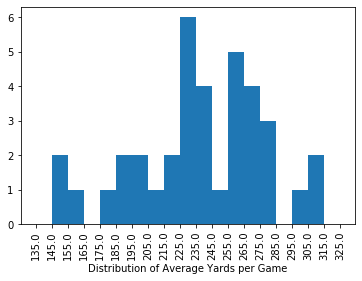

In [17]:
#Distribution of Average Yards per Game
bins = np.arange(ypg['min'], ypg['max'] + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Y/G', bins = bins)
plt.xlabel('Distribution of Average Yards per Game')
plt.xticks(ticks, labels, rotation = 90);

The distribution of average yards per game ranges from 145 to 305. The majority of players range from 225 to 275.

### Distribution of Quarterback Rating

In [20]:
# Stats on QBR column
qbr = df['QBR'].describe().round(0)
qbr

count    39.0
mean     52.0
std      15.0
min      16.0
25%      45.0
50%      54.0
75%      61.0
max      79.0
Name: QBR, dtype: float64

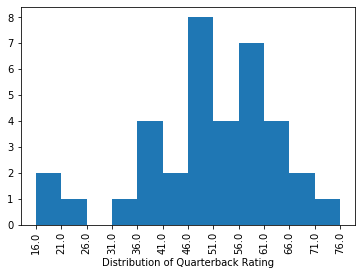

In [23]:
# Distribution of QBR
bins = np.arange(qbr['min'], qbr['max'] + 1, 5)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'QBR', bins = bins)
plt.xlabel('Distribution of Quarterback Rating')
plt.xticks(ticks, labels, rotation = 90);

The distribution of quarterback rating ranges from 16 to 76. The majority of players range on the higher end from 46 to 61.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!